In [178]:
import pandas as pd
import numpy as np
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from collections import defaultdict

In [91]:
pg = pd.read_csv('/Users/AlexanderMakarov/workspace/python/property_data_analysis/1bed_800_23.06.csv')

In [92]:
print(pg.shape)

(805, 21)


In [93]:
pg['Price'].idxmax()

421

In [175]:
pg.sort_values(by='Price', ascending=True).head()

,url,Image,Image_alt,Name,Description,Price,Price Currency,Additional Property,Additional Property (2),Amenity Feature,...,Floor Size,Floor Size Unit Text,Geo Latitude,Geo Longitude,Locality,Number Of Rooms,Postal Code,Street Address,_url_input,Size in sqm
273,https://www.propertyguru.com.sg/listing/229247...,https://sg2-cdn.pgimgs.com/listing/22924770/UP...,The Minton #121027183; The Minton #121027160; ...,The Minton,Description\n \nCheapest Studio Unit for Rent\...,2000,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 500 s...,Air-Conditioning; Bed; Cable TV; Cooker Hob/Ho...,...,500,sqft,1.351835,103.881365,Hougang / Punggol / Sengkang,1,530147.0,147 Hougang Street 11,https://www.propertyguru.com.sg/listing/229247...,46.5
539,https://www.propertyguru.com.sg/listing/223828...,https://sg1-cdn.pgimgs.com/listing/22382893/UP...,Gem Residences #120692608; Gem Residences #120...,Gem Residences,Description\n \nUnblock view\n Dual key unit \...,2000,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 325 s...,Air-Conditioning; Balcony; Cooker Hob/Hood; Co...,...,325,sqft,1.333689,103.853167,Balestier / Toa Payoh,1,319999.0,Lorong 4 / Lorong 6 Toa Payoh,https://www.propertyguru.com.sg/listing/223828...,30.2
791,https://www.propertyguru.com.sg/listing/229286...,https://sg1-cdn.pgimgs.com/listing/22928617/UP...,Casa Cambio #121067210; Casa Cambio #121067268...,Casa Cambio,Description\n \nCall now to enquire\n New Excl...,2000,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; Freehold; 581 sqft; Urba...,Air-Conditioning; Balcony; Bombshelter; Cooker...,...,581,sqft,1.353758,103.876408,Hougang / Punggol / Sengkang,1,547726.0,9 Lim Tua Tow Road,https://www.propertyguru.com.sg/listing/229286...,54.0
690,https://www.propertyguru.com.sg/listing/229313...,https://sg1-cdn.pgimgs.com/listing/22931326/UP...,Sims Edge #121095794; Sims Edge #121095801; Si...,Sims Edge,Description\n \nHigh floor 1 bedroom for rent\...,2000,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; Freehold; 409 sqft; MACL...,Air-Conditioning; Balcony; Bed; Cooker Hob/Hoo...,...,409,sqft,1.316387,103.887910,Eunos / Geylang / Paya Lebar,1,389760.0,1 Geylang East Avenue 2,https://www.propertyguru.com.sg/listing/229313...,38.0
32,https://www.propertyguru.com.sg/listing/226143...,https://sg1-cdn.pgimgs.com/listing/22614305/UP...,Auralis #117879792; Auralis #117879795; Aurali...,Auralis,Description\n \nNear Future Marine Terrace MRT...,2000,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; Freehold; 463 sqft; Sino...,Barbeque Area; Fitness corner; Pavillion; Pool...,...,463,sqft,1.310159,103.916081,East Coast / Marine Parade,1,429081.0,589 East Coast Road,https://www.propertyguru.com.sg/listing/226143...,43.0


In [95]:
pg['Price'].mean()

2935.2683229813665

In [96]:
pg['Size in sqm'] = pg['Floor Size'].apply(lambda x: round(x * 0.092903, 1))

In [97]:
pg.head()

,url,Image,Image_alt,Name,Description,Price,Price Currency,Additional Property,Additional Property (2),Amenity Feature,...,Floor Size,Floor Size Unit Text,Geo Latitude,Geo Longitude,Locality,Number Of Rooms,Postal Code,Street Address,_url_input,Size in sqm
0,https://www.propertyguru.com.sg/listing/223600...,https://sg1-cdn.pgimgs.com/listing/22360097/UP...,Park Place Residences #116641240; Park Place R...,Park Place Residences,Description\n \nVery high floor Unblock view. ...,2600,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 484 s...,Air-Conditioning; Balcony; City View; Cooker H...,...,484,sqft,1.316608,103.892443,Eunos / Geylang / Paya Lebar,1,409055.0,6 Paya Lebar Road,https://www.propertyguru.com.sg/listing/223600...,45.0
1,https://www.propertyguru.com.sg/listing/223781...,https://sg1-cdn.pgimgs.com/listing/22378100/UP...,Park Place Residences #118873192; Park Place R...,Park Place Residences,"Description\n \nMultiple units on hand, differ...",2700,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 484 s...,Air-Conditioning; Balcony; City View; Cooker H...,...,484,sqft,1.316608,103.892443,Eunos / Geylang / Paya Lebar,1,409055.0,6 Paya Lebar Road,https://www.propertyguru.com.sg/listing/223781...,45.0
2,https://www.propertyguru.com.sg/listing/219227...,https://sg1-cdn.pgimgs.com/listing/21922747/UP...,Sturdee Residences #119960144; Sturdee Residen...,Sturdee Residences,Description\n \nKeys on hand! Many units avail...,2500,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 420 s...,Air-Conditioning; Balcony; City View; Cooker H...,...,420,sqft,1.312388,103.859168,Farrer Park / Serangoon Rd,1,209999.0,Sturdee Road,https://www.propertyguru.com.sg/listing/219227...,39.0
3,https://www.propertyguru.com.sg/listing/228745...,https://sg2-cdn.pgimgs.com/listing/22874585/UP...,105 LOR G TELOK KURAU #120806907; 105 LOR G TE...,105 LOR G TELOK KURAU,"Description\n \nSpacious, Well maintained, 1 b...",2500,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; N/A; 650 sqft; N/A; N/A;...,Air-Conditioning; Balcony; Corner Unit; Dryer;...,...,650,sqft,1.318228,103.913134,Eunos / Geylang / Paya Lebar,1,426305.0,LOR G TELOK KURAU,https://www.propertyguru.com.sg/listing/228745...,60.4
4,https://www.propertyguru.com.sg/listing/223646...,https://sg1-cdn.pgimgs.com/listing/22364662/UP...,Park Place Residences #115222062; Park Place R...,Park Place Residences,Description\n \nLuxury Brand New! Walk to Paya...,2499,SGD,Type; Tenure; Floor size; Developer; Land size...,Condominium For Rent; 99-year Leasehold; 484 s...,Air-Conditioning; Balcony; Bed; Cooker Hob/Hoo...,...,484,sqft,1.316608,103.892443,Eunos / Geylang / Paya Lebar,1,409055.0,6 Paya Lebar Road,https://www.propertyguru.com.sg/listing/223646...,45.0


In [98]:
appCoords = pg[['Geo Latitude', 'Geo Longitude']].to_numpy()

In [179]:
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(appCoords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([appCoords[cluster_labels == n] for n in range(num_clusters)])
clusters

0     [[1.316608, 103.892443], [1.316608, 103.892443...
1     [[1.3123877, 103.85916800000001], [1.3123877, ...
2                              [[1.318228, 103.913134]]
3     [[1.3314177332728, 103.86714582209], [1.330599...
4                                 [[1.3163, 103.94044]]
                            ...                        
73                           [[1.3062299, 103.8882208]]
74                     [[1.280985, 103.84078120000001]]
75                 [[1.3791766507808, 103.90283554257]]
76           [[1.3269841999999998, 103.82299429999999]]
77                            [[1.2718989, 103.827198]]
Length: 78, dtype: object

In [136]:
clustersWithProperties = {}
for i, cluster in clusters.items():
    for propertyCoords in cluster:
        singleResidence = pg[(pg['Geo Latitude'] == propertyCoords[0]) & (pg['Geo Longitude'] == propertyCoords[1])]
        for j, unit in singleResidence.iterrows():
            residenceNameCleansed = ''.join(e for e in unit['Name'] if e.isalnum() and not e.isdigit())
            if i in clustersWithProperties:
                if residenceNameCleansed in clustersWithProperties.get(i):
                    clustersWithProperties[i][residenceNameCleansed].append(unit['Price'])
                else:
                    clustersWithProperties[i][residenceNameCleansed] = [unit['Price']]
            else:
                clustersWithProperties[i] = {residenceNameCleansed: [unit['Price']]}

In [149]:
averagePricePerCluster = []
for i, cluster in clustersWithProperties.items():
    numberOfUnits = 0
    totalRentalPricePerCluster = 0
    for propertyName, prices in cluster.items():
        totalRentalPricePerCluster += sum(prices) 
        numberOfUnits += len(prices)
    averagePricePerCluster.append([i, round(totalRentalPricePerCluster / numberOfUnits)])

In [151]:
dfAveragePrice = pd.DataFrame(averagePricePerCluster, columns=['Cluster No', 'Average Price'])

In [152]:
path='/Users/AlexanderMakarov/workspace/python/property_data_analysis/average_price.csv'
dfAveragePrice.to_csv(path)

In [168]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return centermost_point
centermost_points = clusters.map(get_centermost_point)
dfCentermostPoints = pd.DataFrame(centermost_points.array, columns=['Latitude', 'Longitude'])

In [169]:
path='/Users/AlexanderMakarov/workspace/python/property_data_analysis/clusters_coords.csv'
dfCentermostPoints.to_csv(path)

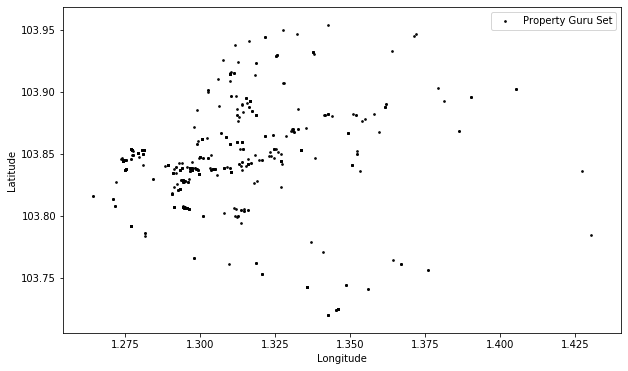

In [170]:
fig, ax = plt.subplots(figsize=[10, 6])
pg_scatter = ax.scatter(pg['Geo Latitude'], pg['Geo Longitude'], c='k', alpha=0.9, s=3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([pg_scatter], ['Property Guru Set'], loc='upper right')
plt.show()